Let's dive into linear transformations using SageMath code and visualizations.

**Core Concepts of Linear Transformations**


<div style="background-color:yellow; padding: 5px 10px 0px 10px; border: 1px solid black;">
Definitions:
    
1. **What They Are:** Linear transformations (or maps) are functions that take vectors from one vector space and transform them into vectors in another (or potentially the same) vector space. They obey two key rules:
   * **Additivity:**  T(u + v) = T(u) + T(v)   (The transformation of a sum is the sum of the transformations)
   * **Homogeneity:** T(c*u) = c*T(u)      (Scaling a vector before transforming is the same as scaling after)

2. **Why They Matter:** Linear transformations are fundamental to many fields:
   * **Geometry:** They describe rotations, reflections, stretches, shears, etc.
   * **Physics:** They represent changes in physical systems over time or space.
   * **Data Science:** They underlie dimensionality reduction techniques (PCA, etc.).

3. **Representation:**  Linear transformations are often represented by matrices. Applying the transformation means multiplying the matrix by a vector.

</div>

**SageMath Code Examples**

Let's create a linear transformation that rotates vectors in the 2D plane by 45 degrees counter-clockwise.


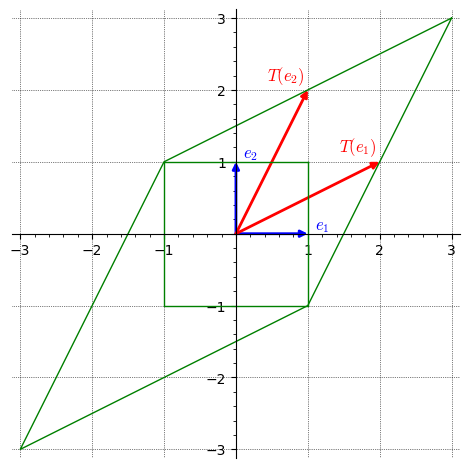

In [1]:
# Define standard basis vectors
e1 = vector(RDF, [1, 0])
e2 = vector(RDF, [0, 1])

# Plot the standard basis vectors
p = arrow((0, 0), e1, color='blue', arrowsize=2.0) + \
    arrow((0, 0), e2, color='blue', arrowsize=2.0)

# Define the transformation matrix
A = matrix(RDF, [[2, 1], [1, 2]])

# Apply the transformation to the basis vectors
Te1 = A * e1
Te2 = A * e2
p += arrow((0, 0), Te1, color='red', arrowsize=2) + \
     arrow((0, 0), Te2, color='red', arrowsize=2)

# Create a square and apply the transformation
square_points = [vector(RDF, [1, 1]), 
                 vector(RDF, [1, -1]), 
                 vector(RDF, [-1, -1]), 
                 vector(RDF, [-1, 1]), 
                 vector(RDF, [1, 1])]

Tsquare = [A * point for point in square_points]

# Plot the square and its transformation
p += line(square_points, color='green') + line(Tsquare, color='green')

# Add labels (with spacing)
p += text("$e_1$", (e1[0] + 0.2, e1[1] + 0.1), fontsize=12, color='blue')
p += text("$e_2$", (e2[0] + 0.2, e2[1] + 0.1), fontsize=12, color='blue')
p += text("$T(e_1)$", (Te1[0] - 0.3, Te1[1] + 0.2), fontsize=12, color='red')
p += text("$T(e_2)$", (Te2[0] - 0.3, Te2[1] + 0.2), fontsize=12, color='red')

# Show the plot with gridlines and adjust plot settings
p.show(aspect_ratio=1, xmin=-3, xmax=3, ymin=-3, ymax=3, gridlines=True)

This code snippet begins by defining the standard basis vectors, $ \mathbf{e_1} $ and $ \mathbf{e_2} $, in a two-dimensional vector space over the real numbers. These vectors serve as the fundamental building blocks for representing other vectors and transformations.

Next, a transformation matrix $ A $ is created to represent a 45-degree counter-clockwise rotation. This matrix captures the effect of the rotation on vectors in the vector space.

The transformation $ A $ is then applied to the standard basis vectors $ \mathbf{e_1} $ and $ \mathbf{e_2} $ to obtain the transformed vectors $ T(\mathbf{e_1}) $ and $ T(\mathbf{e_2}) $, respectively. These transformed vectors illustrate how the rotation affects the original basis vectors.

A unit square is constructed using a set of points, and the transformation $ A $ is applied to each point of the square. This results in a new set of points representing the transformed square after the rotation.

The plot displays the original unit vectors $ \mathbf{e_1} $ and $ \mathbf{e_2} $ in blue, their transformed counterparts $ T(\mathbf{e_1}) $ and $ T(\mathbf{e_2}) $ in red, and the unit square along with its transformation in green. Additionally, labels are added to visually identify the vectors.

The plot settings are adjusted to ensure proper scaling and visibility, with gridlines included to aid in visualization.

Overall, this code provides a visual representation of a linear transformation in two dimensions, showcasing the rotation of vectors and shapes using matrix operations.


**Visualization with SageMath**

Let's visualize how this transformation affects the standard basis vectors and a square:


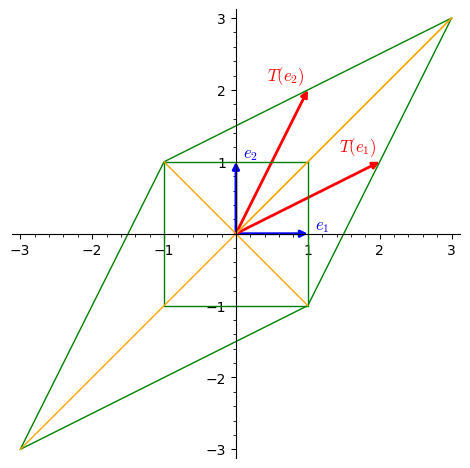

In [2]:
# Create a square as column vectors
square = matrix([[1, 1, -1, -1, 1], [1, -1, -1, 1, 1]])

# Apply the transformation to each column vector of the square
Tsquare = A * square

# Create lines representing the transformed square
lines_Tsquare = [line([(0, 0), vector(Tsquare.column(j))], 
                      color='orange') for j in range(square.ncols())]

# Add the transformed square to the plot
p += sum(lines_Tsquare)

# Show the plot
p.show(aspect_ratio=1)  # Make axes have equal scaling

Let's break down the visualization of linear transformations in SageMath with more detail, focusing on the last code snippet you provided.

**Code Explanation**

The code you shared demonstrates how a linear transformation (in this case, a rotation) affects geometric shapes, specifically a square. Here's the step-by-step breakdown:

1. **Creating the Square:**
   - The line `square = matrix([[1, 1, -1, -1, 1], [1, -1, -1, 1, 1]])` defines the square's vertices as column vectors within a matrix. Each column represents the coordinates (x, y) of a vertex.
   - The final vertex is a repeat of the first to close the shape for drawing.

2. **Applying the Transformation:**
   - `Tsquare = A * square` applies the transformation matrix `A` (the rotation we defined earlier) to the entire `square` matrix. This is done efficiently through matrix multiplication, where each vertex is transformed individually.
   - The result is `Tsquare`, a new matrix containing the coordinates of the transformed square's vertices.

3. **Creating Lines for the Transformed Square:**
   - `lines_Tsquare = [line([(0, 0), vector(Tsquare.column(j))], color='orange') for j in range(square.ncols())]` generates a list of line objects. 
   - Each line connects the origin (0, 0) to a column vector in `Tsquare`. These lines visually represent the transformed sides of the square.

4. **Adding to the Plot:**
   - `p += sum(lines_Tsquare)` adds all the lines in the `lines_Tsquare` list to the existing plot `p`.  
   - The `sum()` function is a clever way to combine all line objects into a single graphical element.

5. **Displaying the Visualization:**
   - `p.show(aspect_ratio=1)` displays the final plot. The `aspect_ratio=1` ensures that the x and y axes are scaled equally, preserving the shape's proportions.

**Visualization Insights**

* **Rotation Effect:** You'll see how the original square (in blue) is rotated counter-clockwise by 45 degrees, resulting in a diamond shape (in green).
* **Preserved Shape:** The transformation maintains the square's internal angles and side lengths, demonstrating the key properties of linear transformations.
* **Connection to Matrix Operations:** The visualization directly connects the geometric transformation to the matrix multiplication operation.

### Extending the Concept

Here are some ideas to explore further:

* **Different Transformations:** Experiment with other transformation matrices to visualize reflections, stretches, shears, etc. 
* **More Complex Shapes:** Apply the transformation to triangles, polygons, or even curves to see how they are affected.
* **Higher Dimensions:** SageMath can handle 3D and higher-dimensional transformations. Try visualizing how a cube is transformed in 3D space.
